# Predicting trips duration - mlopszoomcamp - homework 1
 **By Selorm Komla Darkey**

In [1]:
import pandas as pd
!pip install pyarrow
import matplotlib.pyplot as plt


## EDA

In [27]:
df_jan = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")

In [28]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [29]:
print(f"Number of columns in January 2023 yellow taxi dataset is {len(df_jan.columns)}")

Number of columns in January 2023 yellow taxi dataset is 19


In [30]:
df_feb = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

In [31]:
df_feb.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [32]:
print(f"Number of columns in February 2023 yellow taxi dataset is {len(df_feb.columns)}")

Number of columns in February 2023 yellow taxi dataset is 19


## Calculating the duration variable
**Duration:** Difference between trip pickup time and dropoff time

In [33]:
# inspecting the data types of the columns
df_jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [34]:
df_jan["duration"] = df_jan["tpep_dropoff_datetime"] - df_jan["tpep_pickup_datetime"]

In [35]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [41]:
### converting the datetime to seconds
df_jan['duration'] = df_jan["duration"].apply(lambda td: td.total_seconds()/60)

In [43]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [47]:
import numpy as np
df_jan.duration.std()

42.594351241920904

## Checking the distribution in the trips duration

In [48]:
import seaborn as sns

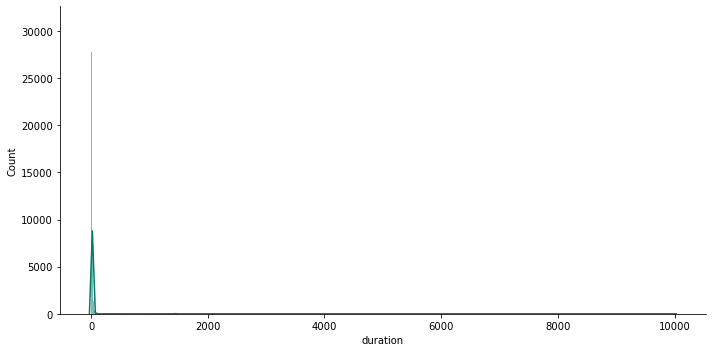

In [52]:
sns.displot(df_jan.duration,
            aspect=2,
            kde=True,
            color='#00796b')

In [53]:
len(df_jan)

3066766

### dropping trip duration below 1 minute or above 60 mins 

In [57]:
df = df[(df_jan["duration"] >= 1) & (df_jan["duration"] <= 60)]

In [59]:
print(f"the amount of records left for trips btn 1 and 60 mins duration is {len(df)}")

the amount of records left for trips btn 1 and 60 mins duration is 3009173


### calculating the fraction of data left


In [60]:
# calculating the fraction of data left

print(f"fraction of data left is {len(df)/len(df_jan) * 100}")

fraction of data left is 98.1220282212598


### One Hot Encoding

In [ ]:
# getting the categorical variables
categorical = ["PULocationID", "DOLocationID"]

In [ ]:
# getting the datatypes of categorical variables
df[categorical].dtypes

# recasting to string data type
df[categorical].astype(str).dtypes

In [ ]:
# getting them back in main df
df[categorical] = df[categorical].astype(str)

In [ ]:
df.dtypes

### getting the feature matrix

In [ ]:
# turning the dataframe to dictionary
train_dict = df[categorical].to_dict(orient='records')

In [ ]:
train_dict

In [ ]:
dv = DictVectorizer()

X_train = dv.fit_transform(train_dict)

In [ ]:
X_train

In [ ]:
# getting the target variables
target = 'duration'

y_train = df[target].values

In [ ]:
y_train

### Training the model

In [ ]:
# linear regression
lr = LinearRegression()

lr.fit(X_train, y_train)

#### Predicting the y-values

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
# checking some values of the predicted vs actuals
print(f"top 20 actual values are {y_train[:20]} and top 20 predicted values are {y_pred[:20]}")

#### Visualizing actuals vs predicted

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

### checking accuracy using RMSE

In [ ]:
mean_squared_error(y_train, y_pred, squared=False)

### Functionizing the data preprocessing steps.

In [ ]:
def prepare_xtrain(dataset):
    """
    This function should take in a dataset and prepare the data to get
    the feature matrix necessary to pass to the regression model to predict.
    """
    df_jan = pd.read_parquet(dataset)
    
    df_jan["duration"] = df_jan["tpep_dropoff_datetime"] - df_jan["tpep_pickup_datetime"]
    # converting duration to seconds
    df_jan['duration'] = df_jan["duration"].apply(lambda td: td.total_seconds()/60)
    
    # selecting only trips between 1 and 60 minutes
    df = df_jan[(df_jan["duration"] >= 1) & (df_jan["duration"] <= 60)]
    
    # getting the categorical variables
    categorical = ["PULocationID", "DOLocationID"]
    
    df[categorical] = df[categorical].astype(str)
    
    return df

### Evaluating the model on February data

#### preparing the data for prediction

In [ ]:
feb_raw_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"

In [ ]:
feb_data_ready = prepare_xtrain(feb_raw_data)

In [ ]:
feb_data_ready.dtypes

### preparing the evaluation feature matrix

In [ ]:
eva_data = feb_data_ready[categorical]

In [ ]:
eva_data

In [ ]:
# converting the data to dicts

eva_data_dicts = eva_data.to_dict(orient='records')


In [ ]:
eva_data_dicts

In [ ]:
# dv = DictVectorizer()

eval_dicts = dv.transform(eva_data_dicts)

### Predicting the feb data

In [ ]:
y_pred_feb = lr.predict(eval_dicts)


### measuring accuracy on feb data

In [ ]:
actual_duration_feb = feb_data_ready["duration"].values

In [ ]:
actual_duration_feb

In [ ]:
mean_squared_error(actual_duration_feb, y_pred_feb, squared=False)

meaning the model is still averagely 8 minutes wrong.